In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import numpy as np

from helpers import *

@FuncFormatter
def duration_fmt(x, pos):
    return humanize.precisedelta(x, minimum_unit='minutes',format='%0.0f')


### plot precision and recall

In [2]:
fname_pr_results = "../../results/distance_varycoverage/performance_measures/global/csv_files/pr_results.csv"

In [3]:
df = pd.read_csv(fname_pr_results)

In [4]:
# add coverage column
df.loc[:,'coverage'] = df['params'].str.split('~').str[6].str.split('__').str[0]

In [5]:
df['Method'] = df.apply(f_method_name, axis=1)

In [19]:
df[df['method']=='predicthaplo'][['recall', 'coverage']].groupby(['coverage']).mean()

recall
coverage        
1000        0.20
10000       0.30
500         0.11
5000        0.24

In [22]:
df[df['method']=='cliquesnv'][['recall', 'coverage']].groupby(['coverage']).min()

recall
coverage        
1000         0.5
10000        0.5
500          0.5
5000         0.5

In [23]:
df[df['method']=='cliquesnv'][['recall', 'coverage']].groupby(['coverage']).max()

recall
coverage        
1000         0.6
10000        0.6
500          0.6
5000         0.6

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_6903/889543347.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


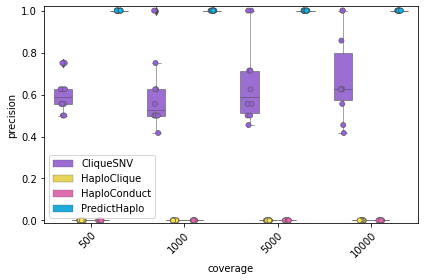

In [7]:
fig, ax = plt.subplots()

order_coverage = ['500', '1000', '5000', '10000']

sns.boxplot(data=df, 
            x="coverage", 
            y="precision",
            hue="Method", 
            hue_order= method_order,
            order = order_coverage, 
            palette=method_palette,  
            ax=ax,
            linewidth=0.5,
            width=0.8
           )

sns.stripplot(
    data=df,
    x="coverage",
    y="precision",
    hue="Method", 
    hue_order= method_order,  
    palette=method_palette,  
    order = order_coverage, 
    dodge=True,
    #clip_on=False,
    linewidth=0.8,
    edgecolor="gray",
    ax=ax,
)


ax.set_ylim(-0.01, 1.02)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[: len(handles) // 2], labels[: len(handles) // 2])

fig.tight_layout()
fig.show()

fig.savefig("./figures/Figure_4A_varycoverage_precision.svg")

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_6903/3592847375.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


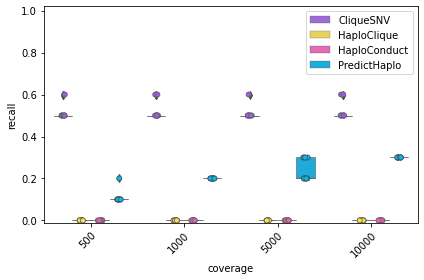

In [8]:
fig, ax = plt.subplots()

order_coverage = ['500', '1000', '5000', '10000']

sns.boxplot(data=df, 
            x="coverage", 
            y="recall",
            hue="Method", 
            hue_order= method_order,
            order = order_coverage, 
            palette=method_palette,  
            ax=ax,
            linewidth=0.5,
            width=0.8
           )

sns.stripplot(
    data=df,
    x="coverage",
    y="recall",
    hue="Method", 
    hue_order= method_order,  
    palette=method_palette,  
    order = order_coverage, 
    dodge=True,
    #clip_on=False,
    linewidth=0.8,
    edgecolor="gray",
    ax=ax,
)


ax.set_ylim(-0.01, 1.02)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[: len(handles) // 2], labels[: len(handles) // 2])

fig.tight_layout()
fig.show()

fig.savefig("./figures/Figure_4A_varycoverage_recall.svg")

### plot mds plot --> for now I decided to exclude this

In [113]:
"""
from pqdm.processes import pqdm
from tqdm import tqdm
import editdistance
from sklearn import manifold

def mds_worker(index, df_pred_grpd, df_true):
    params, replicate = index

    df_true_grpd = df_true[
        (df_true["params"] == params) & (df_true["replicate"] == replicate)
    ]

    # subsample large results
    max_num = 50

    df_pred_grpd = df_pred_grpd.copy()
    df_pred_grpd = (
        df_pred_grpd.groupby("method")
        .apply(lambda x: x.sample(n=min(len(x), max_num)))
        .reset_index(drop=True)
    )

    # compute dissimilarities
    sequence_list = (
        df_pred_grpd["sequence"].tolist() + df_true_grpd["sequence"].tolist()
    )

    mat = np.zeros(shape=(len(sequence_list), len(sequence_list)))
    for i, seq1 in enumerate(tqdm(sequence_list, leave=False)):
        for j, seq2 in enumerate(tqdm(sequence_list, leave=False)):
            if i >= j:
                continue

            mat[i, j] = editdistance.eval(seq1, seq2)

    mat = np.triu(mat) + np.tril(mat.T, 1)  # mirror to make symmetric

    # do MDS
    embedding = manifold.MDS(n_components=2, dissimilarity="precomputed")
    mat_trans = embedding.fit_transform(mat)

    df = pd.concat(
        [
            pd.DataFrame(mat_trans, columns=["MDS0", "MDS1"]),
            pd.concat([df_pred_grpd, df_true_grpd], axis=0, ignore_index=True),
        ],
        axis=1,
    )
    df["method"] = df["method"].apply(lambda x: "ground_truth" if x is None else x)
    df["params"] = params
    df["replicate"] = replicate

    return df


def sequence_embedding(df_pred, df_true):

    # compute
    df_list = pqdm(
        (
            (index, df_group, df_true)
            for index, df_group in df_pred.groupby(["params", "replicate"])
        ),
        mds_worker,
        n_jobs=1,
        argument_type="args",
        desc="Compute MDS",
    )

    # finalize
    return pd.concat(df_list, ignore_index=True)
"""

In [114]:
"""
fname = "../../results/distance_varycoverage/performance_measures/global/csv_files/predictions.csv.gz"
df_pred = pd.read_csv(fname_mds)
df_pred.loc[:,'coverage'] = df_pred['params'].str.split('~').str[6].str.split('__').str[0]
df_pred['Method'] = df_pred.apply(f_method_name, axis=1)

fname_truth = "../../results/distance_varycoverage/performance_measures/global/csv_files/ground_truth.csv.gz"
df_true = pd.read_csv(fname_truth)
"""

In [115]:
"""
df_mds = sequence_embedding(
        df_pred[
            (df_pred["method"] != "haploclique") & (df_pred["method"] != "haploconduct")
        ],
        df_true
    )
"""

Compute MDS: 0it [00:00, ?it/s]





  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




  7%|█████████▋                                                                                                                                        | 2/30 [00:00<00:03,  8.39it/s]




 10%|██████████████▌                                                                                                                                   | 3/30 [00:00<00:04,  5.86it/s]




 13%|███████████████████▍                                                                                                                              | 4/30 [00:00<00:05,  5.07it/s]




 17%|████████████████████████▎                               

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 21/30 [00:04<00:02,  4.06it/s]




 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 22/30 [00:04<00:01,  4.07it/s]




 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 23/30 [00:04<00:01,  4.12it/s]




 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 24/30 [00:05<00:01,  4.07it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 25/30 [00:05<00:01,  4.12it/s]




 87%|████████████████████████████████████████████████████████████

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:05<00:01,  3.92it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 27/30 [00:05<00:00,  3.89it/s]




 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 28/30 [00:05<00:00,  3.89it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:05<00:00,  3.94it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  3.94it/s]




                                                                 

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:04<00:00,  4.06it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  3.93it/s]




                                                                                                                                                                                      



 33%|████████████████████████████████████████████████▎                                                                                                | 10/30 [01:02<01:55,  5.76s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 40%|██████████████████████████████████████████████████████████   

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:02<00:00,  9.75it/s]




                                                                                                                                                                                      



 63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 19/30 [01:36<00:36,  3.33s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 21/30 [00:00<00:00, 86.81it/s]




100%|█████████████████████████████████████████████████████████████

                                                                                                                                                                                      



  3%|████▌                                                                                                                                             | 1/32 [00:07<03:57,  7.67s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




  9%|█████████████▋                                                                                                                                    | 3/32 [00:00<00:02, 12.16it/s]




 16%|██████████████████████▊                                                                                                                           | 5/32 [00:00<00:04,  6.27it/s]




 19%|███████████████████████████▍                                 

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 22/32 [00:04<00:02,  3.92it/s]




 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 23/32 [00:04<00:02,  3.89it/s]




 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 24/32 [00:05<00:02,  3.86it/s]




 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 25/32 [00:05<00:01,  3.85it/s]




 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 26/32 [00:05<00:01,  3.83it/s]




 84%|████████████████████████████████████████████████████████████

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 25/32 [00:04<00:01,  3.62it/s]




 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 26/32 [00:05<00:01,  3.44it/s]




 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 27/32 [00:05<00:01,  3.38it/s]




 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 28/32 [00:05<00:01,  3.49it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:06<00:00,  3.53it/s]




 94%|████████████████████████████████████████████████████████████

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 28/32 [00:04<00:00,  4.52it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:04<00:00,  4.40it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 30/32 [00:04<00:00,  4.30it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 31/32 [00:05<00:00,  4.22it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:05<00:00,  4.16it/s]




                                                                 

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:02<00:00,  9.30it/s]




                                                                                                                                                                                      



 59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 19/32 [01:48<00:50,  3.89s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 66%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 21/32 [00:00<00:00, 85.10it/s]




 94%|█████████████████████████████████████████████████████████████

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 24/34 [00:05<00:02,  4.07it/s]




 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 25/34 [00:05<00:02,  4.07it/s]




 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 26/34 [00:06<00:02,  3.95it/s]




 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 27/34 [00:06<00:01,  4.01it/s]




 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 28/34 [00:06<00:01,  4.01it/s]




 85%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 15%|█████████████████████▍                                                                                                                            | 5/34 [00:00<00:01, 19.74it/s]




 21%|██████████████████████████████                                                                                                                    | 7/34 [00:00<00:03,  8.04it/s]




 26%|██████████████████████████████████████▋                                                                                                           | 9/34 [00:01<00:04,  5.95it/s]




 29%|██████████████████████████████████████████▋                                                                                                      | 10/34 [00:01<00:04,  5.38it/s]




 32%|██████████████████████████████████████████████▉             

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 29/34 [00:05<00:01,  4.02it/s]




 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 30/34 [00:06<00:00,  4.02it/s]




 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 31/34 [00:06<00:00,  4.01it/s]




 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 32/34 [00:06<00:00,  3.98it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 33/34 [00:06<00:00,  3.97it/s]




100%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 32%|██████████████████████████████████████████████▉                                                                                                  | 11/34 [00:00<00:00, 43.00it/s]




 47%|████████████████████████████████████████████████████████████████████▏                                                                            | 16/34 [00:01<00:02,  8.78it/s]




 56%|█████████████████████████████████████████████████████████████████████████████████                                                                | 19/34 [00:02<00:02,  6.64it/s]




 62%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 21/34 [00:02<00:02,  5.85it/s]




 65%|████████████████████████████████████████████████████████████

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 33/34 [00:04<00:00,  4.47it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:05<00:00,  4.34it/s]




                                                                                                                                                                                      



 41%|███████████████████████████████████████████████████████████▋                                                                                     | 14/34 [01:34<01:53,  5.66s/it]




  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 47%|█████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 28/34 [00:00<00:00, 112.25it/s]




                                                                                                                                                                                      



 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 27/34 [02:17<00:16,  2.37s/it]




  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 85%|█████████████████████████████████████████████████████████████

 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:04<00:03,  3.98it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 19/31 [00:04<00:03,  3.98it/s]




 65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 20/31 [00:04<00:02,  4.02it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [00:04<00:02,  4.00it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:05<00:02,  4.00it/s]




 74%|████████████████████████████████████████████████████████████

 48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 15/31 [00:02<00:03,  4.60it/s]




 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [00:02<00:03,  4.42it/s]




 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [00:03<00:03,  4.29it/s]




 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:03<00:03,  4.19it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 19/31 [00:03<00:02,  4.12it/s]




 65%|████████████████████████████████████████████████████████████

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:04<00:00,  4.07it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:05<00:00,  4.08it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:05<00:00,  4.03it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:05<00:00,  3.99it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:05<00:00,  4.00it/s]




                                                                 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  4.70it/s]




                                                                                                                                                                                      



 42%|████████████████████████████████████████████████████████████▊                                                                                    | 13/31 [01:18<01:31,  5.10s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 15/31 [00:00<00:00, 60.78it/s]




 71%|█████████████████████████████████████████████████████████████

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [01:56<00:06,  1.61s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:00<00:00, 117.08it/s]




                                                                                                                                                                                      



 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [01:56<00:04,  1.35s/it]




  0%|                                                             

  6%|█████████▍                                                                                                                                        | 2/31 [00:15<03:38,  7.55s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 13%|██████████████████▊                                                                                                                               | 4/31 [00:00<00:01, 16.22it/s]




 19%|████████████████████████████▎                                                                                                                     | 6/31 [00:00<00:03,  7.07it/s]




 23%|████████████████████████████████▉                                                                                                                 | 7/31 [00:01<00:04,  5.94it/s]




 26%|█████████████████████████████████████▋                      

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:06<00:00,  3.89it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:06<00:00,  3.93it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:06<00:00,  3.95it/s]




                                                                                                                                                                                      



 16%|███████████████████████▌                                                                                                                          | 5/31 [00:35<03:02,  7.03s/it]




  0%|                                                             

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [00:03<00:02,  4.94it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:03<00:01,  4.67it/s]




 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 23/31 [00:03<00:01,  4.46it/s]




 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 24/31 [00:03<00:01,  4.31it/s]




 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 25/31 [00:04<00:01,  4.21it/s]




 84%|████████████████████████████████████████████████████████████

 45%|█████████████████████████████████████████████████████████████████▍                                                                               | 14/31 [01:24<01:23,  4.89s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [00:00<00:00, 63.87it/s]




 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 23/31 [00:01<00:00,  9.53it/s]




 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:02<00:00,  7.47it/s]




 90%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




                                                                                                                                                                                      



                                                                                                                                                                                      



  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




  6%|█████████▍                                                    

 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [00:03<00:03,  4.07it/s]




 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [00:03<00:03,  4.05it/s]




 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:03<00:03,  4.04it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 19/31 [00:04<00:02,  4.02it/s]




 65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 20/31 [00:04<00:02,  4.05it/s]




 68%|████████████████████████████████████████████████████████████

 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:03<00:02,  4.43it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 19/31 [00:03<00:02,  4.31it/s]




 65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 20/31 [00:03<00:02,  4.21it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [00:03<00:02,  4.17it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:04<00:02,  4.13it/s]




 74%|████████████████████████████████████████████████████████████

 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [00:01<00:01,  8.79it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 19/31 [00:02<00:01,  6.69it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [00:02<00:01,  5.87it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:03<00:01,  5.52it/s]




 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 23/31 [00:03<00:01,  5.22it/s]




 77%|████████████████████████████████████████████████████████████

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:03<00:00,  6.55it/s]




                                                                                                                                                                                      



 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [01:31<01:05,  4.39s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:00<00:00, 70.81it/s]




 84%|█████████████████████████████████████████████████████████████

 31%|█████████████████████████████████████████████▌                                                                                                   | 11/35 [00:02<00:06,  3.98it/s]




 34%|█████████████████████████████████████████████████▋                                                                                               | 12/35 [00:02<00:05,  3.96it/s]




 37%|█████████████████████████████████████████████████████▊                                                                                           | 13/35 [00:03<00:05,  3.95it/s]




 40%|██████████████████████████████████████████████████████████                                                                                       | 14/35 [00:03<00:05,  3.96it/s]




 43%|██████████████████████████████████████████████████████████████▏                                                                                  | 15/35 [00:03<00:05,  3.94it/s]




 46%|████████████████████████████████████████████████████████████

 63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 22/35 [00:04<00:03,  3.94it/s]




 66%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 23/35 [00:05<00:03,  3.96it/s]




 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 24/35 [00:05<00:02,  3.98it/s]




 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 25/35 [00:05<00:02,  3.96it/s]




 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 26/35 [00:05<00:02,  3.97it/s]




 77%|████████████████████████████████████████████████████████████

 29%|█████████████████████████████████████████▍                                                                                                       | 10/35 [00:01<00:02,  8.42it/s]




 34%|█████████████████████████████████████████████████▋                                                                                               | 12/35 [00:01<00:03,  6.59it/s]




 37%|█████████████████████████████████████████████████████▊                                                                                           | 13/35 [00:01<00:03,  5.97it/s]




 40%|██████████████████████████████████████████████████████████                                                                                       | 14/35 [00:01<00:03,  5.50it/s]




 43%|██████████████████████████████████████████████████████████████▏                                                                                  | 15/35 [00:02<00:03,  5.15it/s]




 46%|████████████████████████████████████████████████████████████

 40%|██████████████████████████████████████████████████████████                                                                                       | 14/35 [00:01<00:02,  9.22it/s]




 46%|██████████████████████████████████████████████████████████████████▎                                                                              | 16/35 [00:01<00:02,  7.27it/s]




 51%|██████████████████████████████████████████████████████████████████████████▌                                                                      | 18/35 [00:02<00:02,  6.12it/s]




 54%|██████████████████████████████████████████████████████████████████████████████▋                                                                  | 19/35 [00:02<00:02,  5.66it/s]




 57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 20/35 [00:02<00:02,  5.28it/s]




 60%|████████████████████████████████████████████████████████████

 40%|██████████████████████████████████████████████████████████                                                                                       | 14/35 [00:00<00:00, 56.46it/s]




 57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 20/35 [00:01<00:01,  9.35it/s]




 66%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 23/35 [00:02<00:01,  7.20it/s]




 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 25/35 [00:03<00:01,  6.31it/s]




 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 27/35 [00:03<00:01,  5.65it/s]




 80%|████████████████████████████████████████████████████████████

 60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 21/35 [00:00<00:00, 85.01it/s]




 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 30/35 [00:02<00:00, 10.00it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 34/35 [00:03<00:00,  7.79it/s]




                                                                                                                                                                                      



 57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 20/35 [02:04<01:05,  4.37s/it]




  0%|                                                             

 39%|████████████████████████████████████████████████████████▉                                                                                        | 11/28 [00:02<00:04,  3.96it/s]




 43%|██████████████████████████████████████████████████████████████▏                                                                                  | 12/28 [00:02<00:04,  3.98it/s]




 46%|███████████████████████████████████████████████████████████████████▎                                                                             | 13/28 [00:03<00:03,  3.97it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 14/28 [00:03<00:03,  3.97it/s]




 54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 15/28 [00:03<00:03,  3.97it/s]




 57%|████████████████████████████████████████████████████████████

 39%|████████████████████████████████████████████████████████▉                                                                                        | 11/28 [00:01<00:03,  5.03it/s]




 43%|██████████████████████████████████████████████████████████████▏                                                                                  | 12/28 [00:02<00:03,  4.73it/s]




 46%|███████████████████████████████████████████████████████████████████▎                                                                             | 13/28 [00:02<00:03,  4.48it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 14/28 [00:02<00:03,  4.33it/s]




 54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 15/28 [00:02<00:03,  4.19it/s]




 57%|████████████████████████████████████████████████████████████

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 27/28 [00:05<00:00,  3.96it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:05<00:00,  3.95it/s]




                                                                                                                                                                                      



 25%|████████████████████████████████████▌                                                                                                             | 7/28 [00:42<02:01,  5.79s/it]




  0%|                                                                                                                                                          | 0/28 [00:00<?, ?it/s]




 32%|██████████████████████████████████████████████▉              

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 27/28 [00:03<00:00,  5.49it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:03<00:00,  5.26it/s]




                                                                                                                                                                                      



 46%|███████████████████████████████████████████████████████████████████▎                                                                             | 13/28 [01:09<01:05,  4.40s/it]




  0%|                                                                                                                                                          | 0/28 [00:00<?, ?it/s]




 54%|█████████████████████████████████████████████████████████████

 16%|███████████████████████▌                                                                                                                          | 5/31 [00:01<00:05,  4.48it/s]




 19%|████████████████████████████▎                                                                                                                     | 6/31 [00:01<00:06,  4.15it/s]




 23%|████████████████████████████████▉                                                                                                                 | 7/31 [00:01<00:05,  4.07it/s]




 26%|█████████████████████████████████████▋                                                                                                            | 8/31 [00:01<00:05,  4.03it/s]




 29%|██████████████████████████████████████████▍                                                                                                       | 9/31 [00:02<00:05,  4.03it/s]




 32%|██████████████████████████████████████████████▊             

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 24/31 [00:05<00:01,  3.91it/s]




 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 25/31 [00:05<00:01,  3.91it/s]




 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:05<00:01,  3.96it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:06<00:00,  4.03it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:06<00:00,  4.00it/s]




 94%|████████████████████████████████████████████████████████████

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:05<00:01,  3.93it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:05<00:01,  3.93it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:05<00:00,  3.92it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:05<00:00,  3.93it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:06<00:00,  3.95it/s]




100%|████████████████████████████████████████████████████████████

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:04<00:01,  4.51it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:04<00:00,  4.35it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:04<00:00,  4.25it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:04<00:00,  4.16it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:05<00:00,  4.08it/s]




100%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [01:34<00:57,  4.14s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 19/31 [00:00<00:00, 75.15it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:02<00:00,  9.73it/s]




100%|█████████████████████████████████████████████████████████████

 62%|██████████████████████████████████████████████████████████████████████████████████████████                                                       | 18/29 [00:04<00:02,  4.01it/s]




 66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                  | 19/29 [00:04<00:02,  3.98it/s]




 69%|████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 20/29 [00:04<00:02,  3.95it/s]




 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 21/29 [00:05<00:02,  3.93it/s]




 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 22/29 [00:05<00:01,  3.95it/s]




 79%|████████████████████████████████████████████████████████████

 52%|███████████████████████████████████████████████████████████████████████████                                                                      | 15/29 [00:02<00:03,  4.02it/s]




 55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 16/29 [00:03<00:03,  3.99it/s]




 59%|████████████████████████████████████████████████████████████████████████████████████▉                                                            | 17/29 [00:03<00:03,  3.96it/s]




 62%|██████████████████████████████████████████████████████████████████████████████████████████                                                       | 18/29 [00:03<00:02,  3.94it/s]




 66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                  | 19/29 [00:03<00:02,  3.96it/s]




 69%|████████████████████████████████████████████████████████████

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28/29 [00:05<00:00,  3.96it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  3.94it/s]




                                                                                                                                                                                      



 24%|███████████████████████████████████▏                                                                                                              | 7/29 [00:44<02:12,  6.03s/it]




  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




 31%|█████████████████████████████████████████████▎               

 41%|████████████████████████████████████████████████████████████                                                                                     | 12/29 [01:08<01:22,  4.87s/it]




  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




 48%|██████████████████████████████████████████████████████████████████████                                                                           | 14/29 [00:00<00:00, 54.87it/s]




 69%|████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 20/29 [00:01<00:00,  9.29it/s]




 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 23/29 [00:02<00:00,  7.19it/s]




 86%|████████████████████████████████████████████████████████████

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27/29 [01:42<00:02,  1.09s/it]




  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 114.16it/s]




                                                                                                                                                                                      



 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28/29 [01:43<00:00,  1.19it/s]




  0%|                                                             

 28%|█████████████████████████████████████████                                                                                                         | 9/32 [00:01<00:04,  5.05it/s]




 31%|█████████████████████████████████████████████▎                                                                                                   | 10/32 [00:01<00:04,  4.73it/s]




 34%|█████████████████████████████████████████████████▊                                                                                               | 11/32 [00:01<00:04,  4.52it/s]




 38%|██████████████████████████████████████████████████████▍                                                                                          | 12/32 [00:02<00:04,  4.39it/s]




 41%|██████████████████████████████████████████████████████████▉                                                                                      | 13/32 [00:02<00:04,  4.28it/s]




 44%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 16%|██████████████████████▊                                                                                                                           | 5/32 [00:36<03:12,  7.12s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 22%|███████████████████████████████▉                                                                                                                  | 7/32 [00:00<00:00, 27.97it/s]




 31%|█████████████████████████████████████████████▎                                                                                                   | 10/32 [00:01<00:02,  8.44it/s]




 38%|██████████████████████████████████████████████████████▍      

 66%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 21/32 [00:03<00:02,  4.90it/s]




 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 22/32 [00:03<00:02,  4.65it/s]




 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 23/32 [00:03<00:02,  4.45it/s]




 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 24/32 [00:03<00:01,  4.31it/s]




 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 25/32 [00:04<00:01,  4.20it/s]




 81%|████████████████████████████████████████████████████████████

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 25/32 [00:02<00:00,  7.25it/s]




 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 27/32 [00:03<00:00,  6.49it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:03<00:00,  5.82it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 30/32 [00:03<00:00,  5.52it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 31/32 [00:04<00:00,  5.24it/s]




100%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 28/32 [02:03<00:06,  1.59s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 30/32 [00:00<00:00, 118.54it/s]




                                                                                                                                                                                      



 91%|██████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 13%|███████████████████▍                                                                                                                              | 4/30 [00:00<00:01, 15.83it/s]




 20%|█████████████████████████████▏                                                                                                                    | 6/30 [00:00<00:03,  7.37it/s]




 23%|██████████████████████████████████                                                                                                                | 7/30 [00:00<00:03,  6.21it/s]




 27%|██████████████████████████████████████▉                                                                                                           | 8/30 [00:01<00:03,  5.54it/s]




 30%|███████████████████████████████████████████▊                

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 23%|██████████████████████████████████                                                                                                                | 7/30 [00:00<00:00, 29.31it/s]




 33%|████████████████████████████████████████████████▎                                                                                                | 10/30 [00:00<00:02,  8.74it/s]




 40%|██████████████████████████████████████████████████████████                                                                                       | 12/30 [00:01<00:02,  6.67it/s]




 43%|██████████████████████████████████████████████████████████████▊                                                                                  | 13/30 [00:01<00:02,  5.99it/s]




 47%|████████████████████████████████████████████████████████████

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  4.00it/s]




                                                                                                                                                                                      



 30%|███████████████████████████████████████████▊                                                                                                      | 9/30 [00:56<02:02,  5.83s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 37%|█████████████████████████████████████████████████████▏                                                                                           | 11/30 [00:00<00:00, 41.77it/s]




 53%|█████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 16/30 [01:27<00:58,  4.18s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 18/30 [00:00<00:00, 70.83it/s]




 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:02<00:00,  9.40it/s]




100%|█████████████████████████████████████████████████████████████

 56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 18/32 [00:04<00:03,  3.94it/s]




 59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 19/32 [00:04<00:03,  3.94it/s]




 62%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 20/32 [00:04<00:03,  3.95it/s]




 66%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 21/32 [00:05<00:02,  3.95it/s]




 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 22/32 [00:05<00:02,  3.92it/s]




 72%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 16%|██████████████████████▊                                                                                                                           | 5/32 [00:00<00:01, 19.82it/s]




 22%|███████████████████████████████▉                                                                                                                  | 7/32 [00:00<00:03,  8.06it/s]




 28%|█████████████████████████████████████████                                                                                                         | 9/32 [00:01<00:03,  5.97it/s]




 31%|█████████████████████████████████████████████▎                                                                                                   | 10/32 [00:01<00:04,  5.46it/s]




 34%|█████████████████████████████████████████████████▊          

                                                                                                                                                                                      



 19%|███████████████████████████▍                                                                                                                      | 6/32 [00:43<03:01,  6.98s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 25%|████████████████████████████████████▌                                                                                                             | 8/32 [00:00<00:00, 31.48it/s]




 38%|██████████████████████████████████████████████████████▍                                                                                          | 12/32 [00:01<00:02,  7.96it/s]




 44%|█████████████████████████████████████████████████████████████

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:04<00:00,  4.30it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 30/32 [00:04<00:00,  4.17it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 31/32 [00:05<00:00,  4.10it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:05<00:00,  4.09it/s]




                                                                                                                                                                                      



 31%|█████████████████████████████████████████████▎               

 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 16/32 [01:35<01:14,  4.66s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 18/32 [00:00<00:00, 70.98it/s]




 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 26/32 [00:02<00:00,  9.32it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 30/32 [00:03<00:00,  7.11it/s]




100%|████████████████████████████████████████████████████████████

 23%|██████████████████████████████████                                                                                                                | 7/30 [00:01<00:05,  4.17it/s]




 27%|██████████████████████████████████████▉                                                                                                           | 8/30 [00:01<00:05,  4.10it/s]




 30%|███████████████████████████████████████████▊                                                                                                      | 9/30 [00:02<00:05,  4.05it/s]




 33%|████████████████████████████████████████████████▎                                                                                                | 10/30 [00:02<00:05,  3.99it/s]




 37%|█████████████████████████████████████████████████████▏                                                                                           | 11/30 [00:02<00:04,  3.98it/s]




 40%|██████████████████████████████████████████████████████████  

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 28/30 [00:06<00:00,  4.04it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:06<00:00,  4.07it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.05it/s]




                                                                                                                                                                                      



 10%|██████████████▌                                                                                                                                   | 3/30 [00:21<03:09,  7.02s/it]




  0%|                                                             

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 27%|██████████████████████████████████████▉                                                                                                           | 8/30 [00:00<00:00, 32.72it/s]




 40%|██████████████████████████████████████████████████████████                                                                                       | 12/30 [00:01<00:02,  8.26it/s]




 47%|███████████████████████████████████████████████████████████████████▋                                                                             | 14/30 [00:01<00:02,  6.72it/s]




 53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 16/30 [00:02<00:02,  5.79it/s]




 57%|████████████████████████████████████████████████████████████

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 22/30 [00:02<00:01,  6.15it/s]




 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 24/30 [00:03<00:01,  5.54it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 25/30 [00:03<00:00,  5.27it/s]




 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:03<00:00,  5.03it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 27/30 [00:04<00:00,  4.79it/s]




 93%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 22/30 [00:00<00:00, 56.48it/s]




 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 28/30 [00:02<00:00, 10.43it/s]




                                                                                                                                                                                      



 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 21/30 [01:43<00:29,  3.28s/it]




  0%|                                                             

 18%|█████████████████████████▊                                                                                                                        | 6/34 [00:01<00:05,  5.21it/s]




 21%|██████████████████████████████                                                                                                                    | 7/34 [00:01<00:05,  4.63it/s]




 24%|██████████████████████████████████▎                                                                                                               | 8/34 [00:01<00:05,  4.40it/s]




 26%|██████████████████████████████████████▋                                                                                                           | 9/34 [00:01<00:05,  4.26it/s]




 29%|██████████████████████████████████████████▋                                                                                                      | 10/34 [00:02<00:05,  4.16it/s]




 32%|██████████████████████████████████████████████▉             

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████                                               | 23/34 [00:04<00:02,  3.98it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 24/34 [00:05<00:02,  3.71it/s]




 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 25/34 [00:05<00:02,  3.79it/s]




 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 26/34 [00:05<00:02,  3.85it/s]




 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 27/34 [00:05<00:01,  3.89it/s]




 82%|████████████████████████████████████████████████████████████

 59%|█████████████████████████████████████████████████████████████████████████████████████▎                                                           | 20/34 [00:03<00:03,  4.36it/s]




 62%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 21/34 [00:03<00:03,  4.25it/s]




 65%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 22/34 [00:03<00:02,  4.15it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████                                               | 23/34 [00:04<00:02,  4.07it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 24/34 [00:04<00:02,  4.03it/s]




 74%|████████████████████████████████████████████████████████████

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:05<00:00,  4.05it/s]




                                                                                                                                                                                      



 29%|██████████████████████████████████████████▋                                                                                                      | 10/34 [01:13<02:38,  6.61s/it]




  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 35%|███████████████████████████████████████████████████▏                                                                                             | 12/34 [00:00<00:00, 48.04it/s]




 50%|█████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 17/34 [00:00<00:00, 67.84it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 24/34 [00:01<00:00, 10.25it/s]




 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 28/34 [00:02<00:00,  7.60it/s]




 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 30/34 [00:03<00:00,  6.76it/s]




 94%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 32/34 [00:00<00:00, 127.88it/s]




                                                                                                                                                                                      



 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 31/34 [02:22<00:04,  1.37s/it]




  0%|                                                                                                                                                          | 0/34 [00:00<?, ?it/s]




 97%|█████████████████████████████████████████████████████████████

                                                                                                                                                                                      



  6%|█████████▏                                                                                                                                        | 2/32 [00:16<03:59,  7.99s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 12%|██████████████████▎                                                                                                                               | 4/32 [00:00<00:01, 16.52it/s]




 19%|███████████████████████████▍                                                                                                                      | 6/32 [00:00<00:03,  7.09it/s]




 22%|███████████████████████████████▉                             

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 25/32 [00:05<00:01,  4.00it/s]




 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 26/32 [00:05<00:01,  3.97it/s]




 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 27/32 [00:05<00:01,  3.91it/s]




 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 28/32 [00:05<00:01,  3.86it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:06<00:00,  3.85it/s]




 94%|████████████████████████████████████████████████████████████

 25%|████████████████████████████████████▌                                                                                                             | 8/32 [00:56<02:33,  6.41s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 31%|█████████████████████████████████████████████▎                                                                                                   | 10/32 [00:00<00:00, 43.43it/s]




 47%|███████████████████████████████████████████████████████████████████▉                                                                             | 15/32 [00:01<00:01,  8.92it/s]




 56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 18/32 [00:02<00:02,  6.91it/s]




 62%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 47%|███████████████████████████████████████████████████████████████████▉                                                                             | 15/32 [00:00<00:00, 60.98it/s]




 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 22/32 [00:01<00:01,  9.61it/s]




 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 25/32 [00:02<00:00,  7.75it/s]




 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 27/32 [00:03<00:00,  6.94it/s]




 91%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 29/32 [00:00<00:00, 117.25it/s]




                                                                                                                                                                                      



 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 28/32 [02:01<00:06,  1.55s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 94%|█████████████████████████████████████████████████████████████

                                                                                                                                                                                      



  7%|█████████▋                                                                                                                                        | 2/30 [00:14<03:22,  7.25s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 13%|███████████████████▍                                                                                                                              | 4/30 [00:00<00:01, 15.32it/s]




 20%|█████████████████████████████▏                                                                                                                    | 6/30 [00:00<00:03,  7.05it/s]




 23%|██████████████████████████████████                           

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.01it/s]




                                                                                                                                                                                      



 17%|████████████████████████▎                                                                                                                         | 5/30 [00:34<02:47,  6.70s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 23%|██████████████████████████████████                                                                                                                | 7/30 [00:00<00:00, 27.99it/s]




 33%|████████████████████████████████████████████████▎            

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 27/30 [00:04<00:00,  4.03it/s]




 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 28/30 [00:04<00:00,  3.97it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:05<00:00,  3.95it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  3.86it/s]




                                                                                                                                                                                      



 30%|███████████████████████████████████████████▊                 

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 28/30 [00:03<00:00,  7.18it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  6.47it/s]




                                                                                                                                                                                      



 53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 16/30 [01:27<00:57,  4.10s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 60%|█████████████████████████████████████████████████████████████

 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 16/32 [00:03<00:04,  3.94it/s]




 53%|█████████████████████████████████████████████████████████████████████████████                                                                    | 17/32 [00:04<00:03,  3.92it/s]




 56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 18/32 [00:04<00:03,  3.91it/s]




 59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 19/32 [00:04<00:03,  3.90it/s]




 62%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 20/32 [00:04<00:03,  3.93it/s]




 66%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



  9%|█████████████▋                                                                                                                                    | 3/32 [00:22<03:37,  7.49s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 16%|██████████████████████▊                                                                                                                           | 5/32 [00:00<00:01, 20.27it/s]




 25%|████████████████████████████████████▌                                                                                                             | 8/32 [00:01<00:03,  7.00it/s]




 31%|█████████████████████████████████████████████▎               

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:06<00:00,  4.03it/s]




                                                                                                                                                                                      



 19%|███████████████████████████▍                                                                                                                      | 6/32 [00:43<03:00,  6.94s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 25%|████████████████████████████████████▌                                                                                                             | 8/32 [00:00<00:00, 31.71it/s]




 38%|██████████████████████████████████████████████████████▍      

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 27/32 [00:04<00:01,  3.94it/s]




 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 28/32 [00:04<00:01,  3.93it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:04<00:00,  3.89it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 30/32 [00:05<00:00,  3.88it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 31/32 [00:05<00:00,  3.92it/s]




100%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 16/32 [01:34<01:13,  4.56s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 18/32 [00:00<00:00, 71.22it/s]




 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 26/32 [00:02<00:00,  9.40it/s]




 94%|█████████████████████████████████████████████████████████████

 16%|███████████████████████▌                                                                                                                          | 5/31 [00:01<00:05,  4.43it/s]




 19%|████████████████████████████▎                                                                                                                     | 6/31 [00:01<00:05,  4.29it/s]




 23%|████████████████████████████████▉                                                                                                                 | 7/31 [00:01<00:05,  4.17it/s]




 26%|█████████████████████████████████████▋                                                                                                            | 8/31 [00:01<00:05,  3.94it/s]




 29%|██████████████████████████████████████████▍                                                                                                       | 9/31 [00:02<00:05,  3.89it/s]




 32%|██████████████████████████████████████████████▊             

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 24/31 [00:05<00:01,  3.99it/s]




 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 25/31 [00:05<00:01,  3.98it/s]




 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:05<00:01,  3.97it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:06<00:01,  3.94it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:06<00:00,  3.94it/s]




 94%|████████████████████████████████████████████████████████████

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 25/31 [00:04<00:01,  3.97it/s]




 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:05<00:01,  3.97it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:05<00:01,  3.96it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:05<00:00,  3.94it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:05<00:00,  3.89it/s]




 97%|████████████████████████████████████████████████████████████

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 25/31 [00:03<00:01,  4.93it/s]




 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:03<00:01,  4.74it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:04<00:00,  4.52it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:04<00:00,  4.42it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:04<00:00,  4.29it/s]




 97%|████████████████████████████████████████████████████████████

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:03<00:00,  7.42it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:03<00:00,  6.61it/s]




                                                                                                                                                                                      



 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [01:34<00:58,  4.15s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 61%|█████████████████████████████████████████████████████████████

 57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 16/28 [00:03<00:03,  3.98it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 17/28 [00:04<00:02,  3.99it/s]




 64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/28 [00:04<00:02,  3.96it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 19/28 [00:04<00:02,  3.94it/s]




 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 20/28 [00:04<00:02,  3.96it/s]




 75%|████████████████████████████████████████████████████████████

 61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 17/28 [00:03<00:02,  4.13it/s]




 64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/28 [00:03<00:02,  4.05it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 19/28 [00:03<00:02,  4.01it/s]




 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 20/28 [00:04<00:02,  3.99it/s]




 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21/28 [00:04<00:01,  4.07it/s]




 79%|████████████████████████████████████████████████████████████

 46%|███████████████████████████████████████████████████████████████████▎                                                                             | 13/28 [00:01<00:01,  8.82it/s]




 54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 15/28 [00:01<00:01,  7.00it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 17/28 [00:02<00:01,  5.91it/s]




 64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/28 [00:02<00:01,  5.47it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 19/28 [00:02<00:01,  5.14it/s]




 71%|████████████████████████████████████████████████████████████

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21/28 [00:01<00:00,  9.88it/s]




 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 24/28 [00:02<00:00,  7.57it/s]




 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 26/28 [00:03<00:00,  6.59it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:03<00:00,  5.80it/s]




                                                                                                                                                                                      



 50%|█████████████████████████████████████████████████████████████

 45%|█████████████████████████████████████████████████████████████████                                                                                | 13/29 [00:03<00:03,  4.08it/s]




 48%|██████████████████████████████████████████████████████████████████████                                                                           | 14/29 [00:03<00:03,  4.05it/s]




 52%|███████████████████████████████████████████████████████████████████████████                                                                      | 15/29 [00:03<00:03,  4.04it/s]




 55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 16/29 [00:03<00:03,  4.04it/s]




 59%|████████████████████████████████████████████████████████████████████████████████████▉                                                            | 17/29 [00:04<00:02,  4.02it/s]




 62%|████████████████████████████████████████████████████████████

 34%|██████████████████████████████████████████████████                                                                                               | 10/29 [00:01<00:03,  5.57it/s]




 38%|███████████████████████████████████████████████████████                                                                                          | 11/29 [00:01<00:03,  5.11it/s]




 41%|████████████████████████████████████████████████████████████                                                                                     | 12/29 [00:01<00:03,  4.80it/s]




 45%|█████████████████████████████████████████████████████████████████                                                                                | 13/29 [00:02<00:03,  4.59it/s]




 48%|██████████████████████████████████████████████████████████████████████                                                                           | 14/29 [00:02<00:03,  4.45it/s]




 52%|████████████████████████████████████████████████████████████

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 22/29 [00:03<00:01,  4.29it/s]




 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 23/29 [00:04<00:01,  4.14it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24/29 [00:04<00:01,  4.11it/s]




 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25/29 [00:04<00:00,  4.11it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 26/29 [00:04<00:00,  4.08it/s]




 93%|████████████████████████████████████████████████████████████

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27/29 [00:03<00:00,  5.42it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28/29 [00:03<00:00,  5.16it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  4.88it/s]




                                                                                                                                                                                      



 41%|████████████████████████████████████████████████████████████                                                                                     | 12/29 [01:08<01:20,  4.76s/it]




  0%|                                                             

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 28/29 [00:00<00:00, 106.13it/s]




                                                                                                                                                                                      



 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 27/29 [01:41<00:02,  1.09s/it]




  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 118.25it/s]




                                                                  

 45%|█████████████████████████████████████████████████████████████████                                                                                | 13/29 [00:02<00:03,  4.23it/s]




 48%|██████████████████████████████████████████████████████████████████████                                                                           | 14/29 [00:02<00:03,  4.14it/s]




 52%|███████████████████████████████████████████████████████████████████████████                                                                      | 15/29 [00:02<00:03,  4.08it/s]




 55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 16/29 [00:03<00:03,  4.07it/s]




 59%|████████████████████████████████████████████████████████████████████████████████████▉                                                            | 17/29 [00:03<00:02,  4.04it/s]




 62%|████████████████████████████████████████████████████████████

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 21/29 [00:03<00:01,  4.03it/s]




 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 22/29 [00:04<00:01,  3.98it/s]




 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 23/29 [00:04<00:01,  3.94it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24/29 [00:04<00:01,  3.90it/s]




 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25/29 [00:04<00:01,  3.93it/s]




 90%|████████████████████████████████████████████████████████████

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  4.20it/s]




                                                                                                                                                                                      



 34%|██████████████████████████████████████████████████                                                                                               | 10/29 [00:59<01:40,  5.31s/it]




  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




 41%|████████████████████████████████████████████████████████████                                                                                     | 12/29 [00:00<00:00, 48.08it/s]




 59%|█████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 22/29 [00:00<00:00, 86.84it/s]




                                                                                                                                                                                      



 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 21/29 [01:35<00:20,  2.60s/it]




  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




 79%|█████████████████████████████████████████████████████████████

 41%|██████████████████████████████████████████████████████████▉                                                                                      | 13/32 [00:02<00:04,  4.02it/s]




 44%|███████████████████████████████████████████████████████████████▍                                                                                 | 14/32 [00:03<00:04,  3.97it/s]




 47%|███████████████████████████████████████████████████████████████████▉                                                                             | 15/32 [00:03<00:04,  3.96it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 16/32 [00:03<00:04,  3.90it/s]




 53%|█████████████████████████████████████████████████████████████████████████████                                                                    | 17/32 [00:03<00:03,  3.91it/s]




 56%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 12%|██████████████████▎                                                                                                                               | 4/32 [00:30<03:29,  7.49s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 19%|███████████████████████████▍                                                                                                                      | 6/32 [00:00<00:01, 23.99it/s]




 28%|█████████████████████████████████████████                                                                                                         | 9/32 [00:00<00:02,  7.82it/s]




 34%|█████████████████████████████████████████████████▊           

 53%|█████████████████████████████████████████████████████████████████████████████                                                                    | 17/32 [00:02<00:02,  5.75it/s]




 56%|█████████████████████████████████████████████████████████████████████████████████▌                                                               | 18/32 [00:02<00:02,  5.39it/s]




 59%|██████████████████████████████████████████████████████████████████████████████████████                                                           | 19/32 [00:02<00:02,  5.06it/s]




 62%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 20/32 [00:03<00:02,  4.80it/s]




 66%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 21/32 [00:03<00:02,  4.57it/s]




 69%|████████████████████████████████████████████████████████████

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 28/32 [00:03<00:00,  5.10it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 29/32 [00:04<00:00,  4.84it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 30/32 [00:04<00:00,  4.62it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 31/32 [00:04<00:00,  4.43it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:04<00:00,  4.29it/s]




                                                                 

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 23/32 [00:00<00:00, 98.19it/s]




                                                                                                                                                                                      



 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 22/32 [01:53<00:29,  2.98s/it]




  0%|                                                                                                                                                          | 0/32 [00:00<?, ?it/s]




 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 24/32 [00:00<00:00, 99.92it/s]




                                                                  

 36%|███████████████████████████████████████████████████▊                                                                                             | 10/28 [00:01<00:04,  4.50it/s]




 39%|████████████████████████████████████████████████████████▉                                                                                        | 11/28 [00:02<00:03,  4.37it/s]




 43%|██████████████████████████████████████████████████████████████▏                                                                                  | 12/28 [00:02<00:03,  4.31it/s]




 46%|███████████████████████████████████████████████████████████████████▎                                                                             | 13/28 [00:02<00:03,  4.25it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 14/28 [00:02<00:03,  4.26it/s]




 54%|████████████████████████████████████████████████████████████

 54%|█████████████████████████████████████████████████████████████████████████████▋                                                                   | 15/28 [00:02<00:02,  4.48it/s]




 57%|██████████████████████████████████████████████████████████████████████████████████▊                                                              | 16/28 [00:02<00:02,  4.29it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 17/28 [00:03<00:02,  4.16it/s]




 64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/28 [00:03<00:02,  4.12it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 19/28 [00:03<00:02,  4.04it/s]




 71%|████████████████████████████████████████████████████████████

 64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/28 [00:02<00:01,  6.20it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 19/28 [00:02<00:01,  5.76it/s]




 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 20/28 [00:02<00:01,  5.37it/s]




 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 21/28 [00:02<00:01,  5.05it/s]




 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 22/28 [00:03<00:01,  4.74it/s]




 82%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/28 [00:00<?, ?it/s]




 64%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 18/28 [00:00<00:00, 73.33it/s]




 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 26/28 [00:02<00:00,  9.69it/s]




                                                                                                                                                                                      



 61%|████████████████████████████████████████████████████████████████████████████████████████                                                         | 17/28 [01:21<00:36,  3.33s/it]




  0%|                                                             

                                                                                                                                                                                      



  3%|████▊                                                                                                                                             | 1/30 [00:07<03:37,  7.52s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 10%|██████████████▌                                                                                                                                   | 3/30 [00:00<00:02, 11.33it/s]




 17%|████████████████████████▎                                                                                                                         | 5/30 [00:00<00:04,  5.64it/s]




 20%|█████████████████████████████▏                               

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 25/30 [00:05<00:01,  4.03it/s]




 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:05<00:01,  3.95it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 27/30 [00:05<00:00,  3.94it/s]




 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 28/30 [00:06<00:00,  4.00it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:06<00:00,  4.01it/s]




100%|████████████████████████████████████████████████████████████

 43%|██████████████████████████████████████████████████████████████▊                                                                                  | 13/30 [00:01<00:01,  8.51it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 15/30 [00:01<00:02,  6.84it/s]




 57%|██████████████████████████████████████████████████████████████████████████████████▏                                                              | 17/30 [00:02<00:02,  5.81it/s]




 60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 18/30 [00:02<00:02,  5.43it/s]




 63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 19/30 [00:02<00:02,  5.10it/s]




 67%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 47%|███████████████████████████████████████████████████████████████████▋                                                                             | 14/30 [00:00<00:00, 55.89it/s]




 67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 20/30 [00:01<00:01,  9.30it/s]




 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 23/30 [00:02<00:00,  7.19it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 25/30 [00:03<00:00,  6.27it/s]




 90%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [01:49<00:06,  1.62s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 28/30 [00:00<00:00, 107.62it/s]




                                                                                                                                                                                      



 90%|██████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 13%|███████████████████▍                                                                                                                              | 4/30 [00:00<00:01, 16.51it/s]




 20%|█████████████████████████████▏                                                                                                                    | 6/30 [00:00<00:03,  7.44it/s]




 23%|██████████████████████████████████                                                                                                                | 7/30 [00:00<00:03,  6.28it/s]




 27%|██████████████████████████████████████▉                                                                                                           | 8/30 [00:01<00:03,  5.61it/s]




 30%|███████████████████████████████████████████▊                

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 23%|██████████████████████████████████                                                                                                                | 7/30 [00:00<00:00, 29.38it/s]




 33%|████████████████████████████████████████████████▎                                                                                                | 10/30 [00:00<00:02,  9.01it/s]




 40%|██████████████████████████████████████████████████████████                                                                                       | 12/30 [00:01<00:02,  6.85it/s]




 43%|██████████████████████████████████████████████████████████████▊                                                                                  | 13/30 [00:01<00:02,  6.23it/s]




 47%|████████████████████████████████████████████████████████████

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:05<00:00,  4.01it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  3.94it/s]




                                                                                                                                                                                      



 30%|███████████████████████████████████████████▊                                                                                                      | 9/30 [00:55<01:58,  5.64s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 37%|█████████████████████████████████████████████████████▏       

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 18/30 [00:00<00:00, 74.99it/s]




 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:02<00:00,  9.69it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  7.31it/s]




                                                                                                                                                                                      



 57%|█████████████████████████████████████████████████████████████

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [00:04<00:02,  4.01it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:05<00:02,  4.03it/s]




 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 23/31 [00:05<00:01,  4.03it/s]




 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 24/31 [00:05<00:01,  4.05it/s]




 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 25/31 [00:05<00:01,  4.05it/s]




 84%|████████████████████████████████████████████████████████████

 42%|████████████████████████████████████████████████████████████▊                                                                                    | 13/31 [00:02<00:03,  4.95it/s]




 45%|█████████████████████████████████████████████████████████████████▍                                                                               | 14/31 [00:02<00:03,  4.70it/s]




 48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 15/31 [00:02<00:03,  4.57it/s]




 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [00:02<00:03,  4.44it/s]




 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [00:03<00:03,  4.33it/s]




 58%|████████████████████████████████████████████████████████████

 65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 20/31 [00:03<00:02,  4.82it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [00:03<00:02,  4.65it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:03<00:01,  4.56it/s]




 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 23/31 [00:03<00:01,  4.48it/s]




 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 24/31 [00:04<00:01,  4.43it/s]




 81%|████████████████████████████████████████████████████████████

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:04<00:00,  4.65it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:04<00:00,  4.49it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:04<00:00,  4.36it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:04<00:00,  4.26it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:05<00:00,  4.20it/s]




                                                                 

  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:00<00:00, 87.74it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:02<00:00, 10.10it/s]




                                                                                                                                                                                      



 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [01:43<00:30,  3.08s/it]




  0%|                                                             

 16%|███████████████████████▌                                                                                                                          | 5/31 [00:00<00:04,  6.12it/s]




 19%|████████████████████████████▎                                                                                                                     | 6/31 [00:01<00:04,  5.34it/s]




 23%|████████████████████████████████▉                                                                                                                 | 7/31 [00:01<00:04,  4.83it/s]




 26%|█████████████████████████████████████▋                                                                                                            | 8/31 [00:01<00:05,  4.54it/s]




 29%|██████████████████████████████████████████▍                                                                                                       | 9/31 [00:01<00:05,  4.34it/s]




 32%|██████████████████████████████████████████████▊             

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:06<00:00,  4.02it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:06<00:00,  4.00it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:06<00:00,  4.00it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:06<00:00,  3.74it/s]




                                                                                                                                                                                      



 13%|██████████████████▊                                          

 29%|██████████████████████████████████████████▍                                                                                                       | 9/31 [00:00<00:00, 34.39it/s]




 42%|████████████████████████████████████████████████████████████▊                                                                                    | 13/31 [00:01<00:02,  8.54it/s]




 48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 15/31 [00:01<00:02,  6.80it/s]




 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [00:02<00:02,  5.81it/s]




 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:02<00:02,  5.43it/s]




 61%|████████████████████████████████████████████████████████████

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 24/31 [00:03<00:01,  5.19it/s]




 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 25/31 [00:03<00:01,  4.87it/s]




 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:03<00:01,  4.65it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:03<00:00,  4.50it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:04<00:00,  4.35it/s]




 94%|████████████████████████████████████████████████████████████

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 24/31 [00:00<00:00, 96.58it/s]




                                                                                                                                                                                      



 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 23/31 [01:50<00:20,  2.59s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 25/31 [00:00<00:00, 101.00it/s]




                                                                  

 39%|█████████████████████████████████████████████████████████                                                                                        | 13/33 [00:02<00:04,  4.05it/s]




 42%|█████████████████████████████████████████████████████████████▌                                                                                   | 14/33 [00:03<00:04,  3.95it/s]




 45%|█████████████████████████████████████████████████████████████████▉                                                                               | 15/33 [00:03<00:04,  3.95it/s]




 48%|██████████████████████████████████████████████████████████████████████▎                                                                          | 16/33 [00:03<00:04,  3.95it/s]




 52%|██████████████████████████████████████████████████████████████████████████▋                                                                      | 17/33 [00:03<00:04,  3.91it/s]




 55%|████████████████████████████████████████████████████████████

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 31/33 [00:06<00:00,  3.91it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 32/33 [00:07<00:00,  3.94it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:07<00:00,  3.97it/s]




                                                                                                                                                                                      



 12%|█████████████████▋                                                                                                                                | 4/33 [00:31<03:42,  7.67s/it]




  0%|                                                             

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 30/33 [00:05<00:00,  3.99it/s]




 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 31/33 [00:06<00:00,  4.00it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 32/33 [00:06<00:00,  4.00it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:06<00:00,  3.97it/s]




                                                                                                                                                                                      



 21%|██████████████████████████████▉                              

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 28/33 [00:04<00:01,  4.45it/s]




 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 29/33 [00:04<00:00,  4.30it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 30/33 [00:04<00:00,  4.21it/s]




 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 31/33 [00:05<00:00,  4.11it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 32/33 [00:05<00:00,  4.08it/s]




100%|████████████████████████████████████████████████████████████

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 31/33 [00:03<00:00,  7.48it/s]




                                                                                                                                                                                      



 55%|███████████████████████████████████████████████████████████████████████████████                                                                  | 18/33 [01:46<01:04,  4.33s/it]




  0%|                                                                                                                                                          | 0/33 [00:00<?, ?it/s]




 61%|███████████████████████████████████████████████████████████████████████████████████████▉                                                         | 20/33 [00:00<00:00, 78.27it/s]




 85%|█████████████████████████████████████████████████████████████

 39%|█████████████████████████████████████████████████████████                                                                                        | 13/33 [00:03<00:05,  3.99it/s]




 42%|█████████████████████████████████████████████████████████████▌                                                                                   | 14/33 [00:03<00:04,  3.94it/s]




 45%|█████████████████████████████████████████████████████████████████▉                                                                               | 15/33 [00:03<00:04,  3.97it/s]




 48%|██████████████████████████████████████████████████████████████████████▎                                                                          | 16/33 [00:03<00:04,  3.96it/s]




 52%|██████████████████████████████████████████████████████████████████████████▋                                                                      | 17/33 [00:04<00:04,  3.98it/s]




 55%|████████████████████████████████████████████████████████████

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 28/33 [00:06<00:01,  3.99it/s]




 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 29/33 [00:06<00:01,  3.95it/s]




 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 30/33 [00:06<00:00,  3.95it/s]




 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 31/33 [00:06<00:00,  3.91it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 32/33 [00:07<00:00,  3.93it/s]




100%|████████████████████████████████████████████████████████████

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 23/33 [00:04<00:02,  4.01it/s]




 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 24/33 [00:04<00:02,  4.01it/s]




 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 25/33 [00:05<00:01,  4.02it/s]




 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 26/33 [00:05<00:01,  4.03it/s]




 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 27/33 [00:05<00:01,  4.06it/s]




 85%|████████████████████████████████████████████████████████████

 27%|███████████████████████████████████████▊                                                                                                          | 9/33 [01:03<02:38,  6.59s/it]




  0%|                                                                                                                                                          | 0/33 [00:00<?, ?it/s]




 33%|████████████████████████████████████████████████▎                                                                                                | 11/33 [00:00<00:00, 46.10it/s]




 48%|██████████████████████████████████████████████████████████████████████▎                                                                          | 16/33 [00:01<00:01,  9.08it/s]




 58%|███████████████████████████████████████████████████████████████████████████████████▍                                                             | 19/33 [00:02<00:02,  6.89it/s]




 64%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 42%|█████████████████████████████████████████████████████████████▌                                                                                   | 14/33 [01:32<01:48,  5.68s/it]




  0%|                                                                                                                                                          | 0/33 [00:00<?, ?it/s]




 48%|██████████████████████████████████████████████████████████████████████▎                                                                          | 16/33 [00:00<00:00, 62.39it/s]




 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 23/33 [00:02<00:01,  8.90it/s]




 79%|█████████████████████████████████████████████████████████████

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 28/33 [02:13<00:09,  1.88s/it]




  0%|                                                                                                                                                          | 0/33 [00:00<?, ?it/s]




 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 30/33 [00:00<00:00, 116.95it/s]




                                                                                                                                                                                      



 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 29/33 [02:14<00:06,  1.63s/it]




  0%|                                                             

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:06<00:00,  4.03it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:06<00:00,  4.00it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:07<00:00,  3.95it/s]




                                                                                                                                                                                      



  6%|█████████▍                                                                                                                                        | 2/31 [00:14<03:34,  7.38s/it]




  0%|                                                             

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 26/31 [00:05<00:01,  3.98it/s]




 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 27/31 [00:05<00:01,  3.95it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 28/31 [00:05<00:00,  3.94it/s]




 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:06<00:00,  3.98it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:06<00:00,  3.94it/s]




100%|████████████████████████████████████████████████████████████

 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:02<00:02,  6.03it/s]




 61%|████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 19/31 [00:02<00:02,  5.58it/s]




 65%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 20/31 [00:02<00:02,  5.20it/s]




 68%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 21/31 [00:03<00:02,  4.88it/s]




 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 22/31 [00:03<00:01,  4.62it/s]




 74%|████████████████████████████████████████████████████████████

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [00:03<00:00,  5.71it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [00:04<00:00,  5.43it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  5.15it/s]




                                                                                                                                                                                      



 45%|█████████████████████████████████████████████████████████████████▍                                                                               | 14/31 [01:23<01:22,  4.85s/it]




  0%|                                                             

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 29/31 [01:57<00:02,  1.11s/it]




  0%|                                                                                                                                                          | 0/31 [00:00<?, ?it/s]




100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 125.15it/s]




                                                                                                                                                                                      



 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 30/31 [01:57<00:00,  1.17it/s]




  0%|                                                             

 43%|██████████████████████████████████████████████████████████████▊                                                                                  | 13/30 [00:02<00:04,  4.07it/s]




 47%|███████████████████████████████████████████████████████████████████▋                                                                             | 14/30 [00:02<00:03,  4.03it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 15/30 [00:03<00:03,  3.96it/s]




 53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 16/30 [00:03<00:03,  3.93it/s]




 57%|██████████████████████████████████████████████████████████████████████████████████▏                                                              | 17/30 [00:03<00:03,  3.89it/s]




 60%|████████████████████████████████████████████████████████████

 57%|██████████████████████████████████████████████████████████████████████████████████▏                                                              | 17/30 [00:02<00:02,  4.49it/s]




 60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 18/30 [00:03<00:02,  4.13it/s]




 63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 19/30 [00:03<00:02,  4.07it/s]




 67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 20/30 [00:03<00:02,  4.05it/s]




 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 21/30 [00:03<00:02,  4.03it/s]




 73%|████████████████████████████████████████████████████████████

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 22/30 [00:02<00:01,  5.84it/s]




 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 23/30 [00:03<00:01,  5.48it/s]




 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 24/30 [00:03<00:01,  5.20it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 25/30 [00:03<00:01,  4.94it/s]




 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:03<00:00,  4.79it/s]




 90%|████████████████████████████████████████████████████████████

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 27/30 [00:02<00:00,  9.80it/s]




                                                                                                                                                                                      



 60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 18/30 [01:32<00:42,  3.57s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 20/30 [00:00<00:00, 79.95it/s]




 93%|█████████████████████████████████████████████████████████████

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 28/30 [00:06<00:00,  3.85it/s]




 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [00:07<00:00,  3.88it/s]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  3.89it/s]




                                                                                                                                                                                      



  3%|████▊                                                                                                                                             | 1/30 [00:07<03:36,  7.46s/it]




  0%|                                                             

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 23/30 [00:04<00:01,  4.02it/s]




 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 24/30 [00:05<00:01,  4.02it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 25/30 [00:05<00:01,  3.99it/s]




 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:05<00:01,  3.97it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 27/30 [00:05<00:00,  3.95it/s]




 93%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 30%|███████████████████████████████████████████▊                                                                                                      | 9/30 [00:00<00:00, 36.39it/s]




 43%|██████████████████████████████████████████████████████████████▊                                                                                  | 13/30 [00:01<00:01,  8.89it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 15/30 [00:01<00:02,  7.04it/s]




 57%|██████████████████████████████████████████████████████████████████████████████████▏                                                              | 17/30 [00:02<00:02,  5.99it/s]




 60%|████████████████████████████████████████████████████████████

 40%|██████████████████████████████████████████████████████████                                                                                       | 12/30 [01:11<01:31,  5.10s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 47%|███████████████████████████████████████████████████████████████████▋                                                                             | 14/30 [00:00<00:00, 56.67it/s]




 67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 20/30 [00:01<00:01,  9.48it/s]




 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 23/30 [00:02<00:00,  7.26it/s]




 83%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [01:48<00:06,  1.60s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 28/30 [00:00<00:00, 115.00it/s]




                                                                                                                                                                                      



 90%|██████████████████████████████████████████████████████████████

 21%|██████████████████████████████▏                                                                                                                   | 6/29 [00:00<00:03,  6.87it/s]




 24%|███████████████████████████████████▏                                                                                                              | 7/29 [00:01<00:03,  5.94it/s]




 28%|████████████████████████████████████████▎                                                                                                         | 8/29 [00:01<00:03,  5.31it/s]




 31%|█████████████████████████████████████████████▎                                                                                                    | 9/29 [00:01<00:04,  4.89it/s]




 34%|██████████████████████████████████████████████████                                                                                               | 10/29 [00:01<00:04,  4.58it/s]




 38%|███████████████████████████████████████████████████████     

 48%|██████████████████████████████████████████████████████████████████████                                                                           | 14/29 [00:02<00:02,  5.43it/s]




 52%|███████████████████████████████████████████████████████████████████████████                                                                      | 15/29 [00:02<00:02,  5.05it/s]




 55%|████████████████████████████████████████████████████████████████████████████████                                                                 | 16/29 [00:02<00:02,  4.75it/s]




 59%|████████████████████████████████████████████████████████████████████████████████████▉                                                            | 17/29 [00:02<00:02,  4.22it/s]




 62%|██████████████████████████████████████████████████████████████████████████████████████████                                                       | 18/29 [00:03<00:02,  4.17it/s]




 66%|████████████████████████████████████████████████████████████

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 21/29 [00:02<00:01,  6.03it/s]




 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 22/29 [00:02<00:01,  5.67it/s]




 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 23/29 [00:03<00:01,  5.33it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 24/29 [00:03<00:00,  5.07it/s]




 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 25/29 [00:03<00:00,  4.81it/s]




 90%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                  | 19/29 [01:30<00:30,  3.07s/it]




  0%|                                                                                                                                                          | 0/29 [00:00<?, ?it/s]




 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 21/29 [00:00<00:00, 84.38it/s]




                                                                                                                                                                                      



 69%|██████████████████████████████████████████████████████████████

 30%|███████████████████████████████████████████▊                                                                                                      | 9/30 [00:01<00:04,  4.36it/s]




 33%|████████████████████████████████████████████████▎                                                                                                | 10/30 [00:02<00:04,  4.22it/s]




 37%|█████████████████████████████████████████████████████▏                                                                                           | 11/30 [00:02<00:04,  4.13it/s]




 40%|██████████████████████████████████████████████████████████                                                                                       | 12/30 [00:02<00:04,  4.06it/s]




 43%|██████████████████████████████████████████████████████████████▊                                                                                  | 13/30 [00:02<00:04,  4.01it/s]




 47%|████████████████████████████████████████████████████████████

  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 20%|█████████████████████████████▏                                                                                                                    | 6/30 [00:00<00:01, 23.64it/s]




 30%|███████████████████████████████████████████▊                                                                                                      | 9/30 [00:01<00:02,  7.70it/s]




 37%|█████████████████████████████████████████████████████▏                                                                                           | 11/30 [00:01<00:03,  6.10it/s]




 40%|██████████████████████████████████████████████████████████                                                                                       | 12/30 [00:01<00:03,  5.61it/s]




 43%|████████████████████████████████████████████████████████████

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 23/30 [00:03<00:01,  4.33it/s]




 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 24/30 [00:04<00:01,  4.24it/s]




 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 25/30 [00:04<00:01,  4.17it/s]




 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 26/30 [00:04<00:00,  4.12it/s]




 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 27/30 [00:04<00:00,  4.08it/s]




 93%|████████████████████████████████████████████████████████████

                                                                                                                                                                                      



 43%|██████████████████████████████████████████████████████████████▊                                                                                  | 13/30 [01:15<01:23,  4.90s/it]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




 50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 15/30 [00:00<00:00, 60.05it/s]




 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 22/30 [00:01<00:00,  9.27it/s]




 83%|█████████████████████████████████████████████████████████████

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 120.16it/s]




                                                                                                                                                                                      



 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 29/30 [01:49<00:00,  1.19it/s]




  0%|                                                                                                                                                          | 0/30 [00:00<?, ?it/s]




                                                                                                                                                                                      



                                                                   

 42%|████████████████████████████████████████████████████████████▊                                                                                    | 13/31 [00:02<00:04,  4.22it/s]




 45%|█████████████████████████████████████████████████████████████████▍                                                                               | 14/31 [00:02<00:04,  3.97it/s]




 48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 15/31 [00:03<00:04,  3.69it/s]




 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [00:03<00:03,  3.79it/s]




 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [00:03<00:03,  3.86it/s]




 58%|████████████████████████████████████████████████████████████

 45%|█████████████████████████████████████████████████████████████████▍                                                                               | 14/31 [00:02<00:03,  5.43it/s]




 48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 15/31 [00:02<00:03,  5.04it/s]




 52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 16/31 [00:02<00:03,  4.73it/s]




 55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 17/31 [00:02<00:03,  4.57it/s]




 58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 18/31 [00:03<00:02,  4.40it/s]




 61%|████████████████████████████████████████████████████████████

KeyboardInterrupt: 

In [116]:
"""
replicate_id = 3
coverage = "10000"
df_mds_plot = df_mds[(df_mds['coverage']==coverage) & (df_mds['replicate']==replicate_id)]
"""

In [117]:
"""
def f_freq_bins(x):
    if x>0.2:
        return 0.3
    elif x>0.1:
        return 0.2
    elif x>0.05:
        return 0.1
    elif x>0.01:
        return 0.05
    elif x<=0.01:
        return 0.01
    
df_mds_plot["Frequency"] = df_mds_plot["frequency"].apply(f_freq_bins)
"""

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_66336/3400492920.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mds_plot["Frequency"] = df_mds_plot["frequency"].apply(f_freq_bins)


In [118]:
"""
#order_mds = ["ground truth",  'CliqueSNV', 'HaploClique', 'HaploConduct', 'PredictHaplo' ]
order_mds = ["ground truth",  'CliqueSNV', 'PredictHaplo' ]
"""

In [119]:
"""
df_mds_plot = df_mds_plot[df_mds_plot['Method'].isin(order_mds)]
"""

Text(0, 0.5, '')

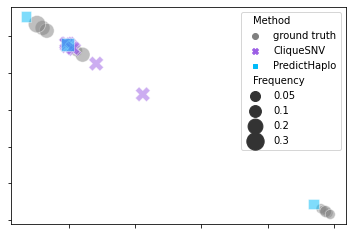

In [120]:
"""
g = sns.scatterplot(
            data=df_mds_plot.sort_values("Method",  key=np.vectorize(order_mds.index)), 
            x="MDS1", 
            y="MDS0", 
            size="Frequency",
            hue="Method", 
            hue_order= order_mds, 
            style_order = order_mds, 
            style="Method", 
            sizes=(100, 300),
            palette=method_palette,
            alpha=0.5,
            legend=True,  
            )

g.set_xticklabels("")
g.set_yticklabels("")
g.set_xlabel("")
g.set_ylabel("")
"""

### plot N50 

In [46]:
fname_n50 = "../../results/distance_varycoverage/performance_measures/global/csv_files/quast_results.csv"
df_n50 = pd.read_csv(fname_n50)
df_n50.loc[:,'coverage'] = df_n50['params'].str.split('~').str[6].str.split('__').str[0]
df_n50['Method'] = df_n50.apply(f_method_name, axis=1)

In [47]:
df_n50

col = "N50"

Unnamed: 0  contig_count  contig_total_length  contig_max_length    N50  \
0             0             3                 3368               1734   1734   
1             1             1                 1141               1141   1141   
2             2             2                 1562                976    976   
3             3             3                 3658               1379   1274   
4             4             4                 3702               1403    907   
..          ...           ...                  ...                ...    ...   
897         897             2                20000              10000  10000   
898         898             1                10000              10000  10000   
899         899             3                30000              10000  10000   
900         900             1                10000              10000  10000   
901         901             1                10000              10000  10000   

       N75  L50  L75      reference  \
0     1066    1    2  haplotype0009   
1     1141    1    1  haplotype0008   
2      586    1    2  haplotype0003   
3     1005    2    3  haplotype0001   
4      864    2    3  haplotype0006   
..     ...  ...  ...            ...   
897  10000    1    2  haplotype0000   
898  10000    1    1  haplotype0008   
899  10000    2    3  haplotype0001   
900  10000    1    1  haplotype0002   
901  10000    1    1  haplotype0000   

                                                params       method  \
0    seq_tech~illumina__seq_mode~shotgun__seq_mode_...  haploclique   
1    seq_tech~illumina__seq_mode~shotgun__seq_mode_...  haploclique   
2    seq_tech~illumina__seq_mode~shotgun__seq_mode_...  haploclique   
3    seq_tech~illumina__seq_mode~shotgun__seq_mode_...  haploclique   
4    seq_tech~illumina__seq_mode~shotgun__seq_mode_...  haploclique   
..                                                 ...          ...   
897  seq_tech~illumina__seq_mode~shotgun__seq_mode_...    cliquesnv   
898  seq_tech~illumina__seq_mode~shotgun__seq_mode_...    cliquesnv   
899  seq_tech~illumina__seq_mode~shotgun__seq_mode_...    cliquesnv   
900  seq_tech~illumina__seq_mode~shotgun__seq_mode_...    cliquesnv   
901  seq_tech~illumina__seq_mode~shotgun__seq_mode_...    cliquesnv   

     replicate coverage       Method  
0            0      500  HaploClique  
1            0      500  HaploClique  
2            0      500  HaploClique  
3            0      500  HaploClique  
4            0      500  HaploClique  
..         ...      ...          ...  
897          8    10000    CliqueSNV  
898          9    10000    CliqueSNV  
899          9    10000    CliqueSNV  
900          9    10000    CliqueSNV  
901          9    10000    CliqueSNV  

[902 rows x 14 columns]

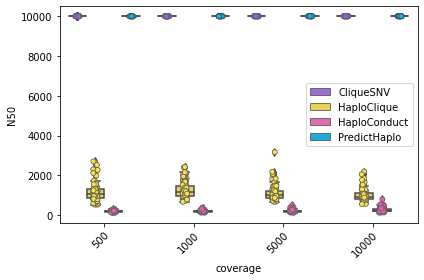

In [55]:
fig, ax = plt.subplots()

col = "N50"

sns.boxplot(data=df_n50, 
            x="coverage", 
            y=col, 
            hue="Method", 
            hue_order= method_order,  
            palette=method_palette,  
            order = order_coverage, 
            ax=ax)

sns.stripplot(
    data=df_n50,
    x="coverage",
    y=col,
    hue="Method",
    hue_order= method_order,  
    palette=method_palette,  
    order = order_coverage, 
    dodge=True,
    clip_on=False,
    linewidth=0.8,
    edgecolor="gray",
    ax=ax,
)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[: len(handles) // 2], labels[: len(handles) // 2])

fig.tight_layout()
fig.savefig("./figures/Figure_4A_varycoverage_n50.svg")

### plot runtime

In [59]:
fname_runtime = "../../results/distance_varycoverage/runtime.csv"
df_runtime = pd.read_csv(fname_runtime)
df_runtime.loc[:,'coverage'] = df_runtime['params'].str.split('~').str[6].str.split('__').str[0]
df_runtime['Method'] = df_runtime.apply(f_method_name, axis=1)

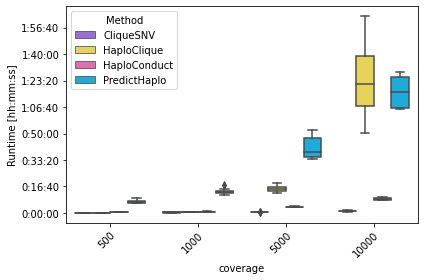

In [70]:
import datetime

def fmt_yaxis(x, pos):
        return str(datetime.timedelta(seconds=x))

# plot
fig, ax = plt.subplots()

sns.boxplot(data=df_runtime, 
            x="coverage", 
            y="s", 
            hue="Method", 
            hue_order= method_order,  
            palette=method_palette,  
            order = order_coverage,
            ax=ax)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
)

ax.set_ylabel("Runtime [hh:mm:ss]")
ax.yaxis.set_major_formatter(fmt_yaxis)

fig.tight_layout()
fig.savefig("./figures/Figure_4A_varycoverage_runtime.svg")